<a href="https://colab.research.google.com/github/CatIsOutOfTheBag/ExamplesDS/blob/main/Gradient_boosting_by_hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Регрессия

In [65]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression # генерация данных для регрессии

In [66]:
X, y = make_regression(n_samples=10, n_features=3)

In [67]:
df = pd.DataFrame(X)
df['y_true'] = y

In [68]:
# делаем константное предсказание - среднее по таргеты
df['y_pred_0'] = df['y_true'].mean()
df

,0,1,2,y_true,y_pred_0
0,-0.111303,-0.411223,-1.076216,-71.075816,-15.367971
1,-0.719981,-0.401933,-0.196453,-46.575007,-15.367971
2,0.120886,-1.217243,-0.316446,-111.288633,-15.367971
3,0.299101,0.657483,1.498026,107.340996,-15.367971
4,0.485114,0.512510,-0.893672,17.609312,-15.367971
5,-0.612116,-0.720766,1.423814,-18.604904,-15.367971
6,-0.718693,0.381721,-0.183508,19.455643,-15.367971
7,-0.520255,-0.710420,-0.472840,-79.771747,-15.367971
8,-0.554880,0.847903,-0.243674,57.941846,-15.367971
9,-2.147283,-0.957793,2.130827,-28.711401,-15.367971


In [69]:
# считаем ошибку на константном предсказании
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(df['y_true'], df['y_pred_0']) # видим, что в среднем модель ошибается на 52

52.76393639934245

In [70]:
# посчитаем остатки
# сколько пунктов предсказанию не хватает до истинного ответа
df['residual_0'] = df['y_true'] - df['y_pred_0']

# остатки - это и есть градиент - производная квадратичной функции потерь по предикту,
# взятая с противоположным знаком, так как движение идет по антиградиенту - 
# в сторону наискорейшего убывания функции потерь

# diff( (1/2) * (y_pred - y_true)**2 ) = - (y_true - y_pred)

Сделаем шаг с первым деревом-пнем

In [71]:
# сделаем дерево-пень
from sklearn.tree import DecisionTreeRegressor
tree_1 = DecisionTreeRegressor(max_depth=1)

In [72]:
# обучим его на ошибке константного предсказания
tree_1.fit(df[[0,1,2]], df['residual_0'])

DecisionTreeRegressor(max_depth=1)

In [73]:
# сделаем предикт с помощью этого дерева
df['tree_pred_1'] = tree_1.predict(df[[0,1,2]])

[Text(0.5, 0.75, 'X[1] <= -0.01\nsquared_error = 4034.639\nsamples = 10\nvalue = 0.0'),
 Text(0.25, 0.25, 'squared_error = 1002.375\nsamples = 6\nvalue = -43.97'),
 Text(0.75, 0.25, 'squared_error = 1332.95\nsamples = 4\nvalue = 65.955')]

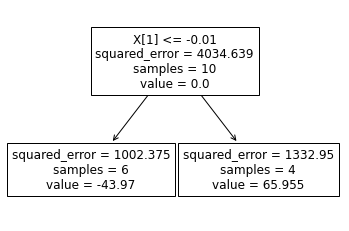

In [74]:
# посмотрим на это дерево
from sklearn.tree import plot_tree
plot_tree(tree_1)

# дерево предиктит среднее по сэмплам, которые попали в каждый лист

In [75]:
# будем пошагово улучшать предсказание - бустить
# каждое следующее дерево будет обучаться на ошибке предыдущего

# бустим:
# предсказание дерева прибавляем к константному предсказанию,
# предварительно умножив на скорость обучения - learning rate

nu = 0.1
df['y_pred_1'] = df['y_pred_0'] + nu * df['tree_pred_1']

In [76]:
# посчитаем ошибку на новом предсказании
mean_absolute_error(df['y_true'], df['y_pred_1']) # видим, что ошибка уменьшилась


47.7195551504132

И еще один аналогичный шаг со вторым деревом-пнем

In [77]:
# посчитаем остатки после предыдущего шага
df['residual_1'] = df['y_true'] - df['y_pred_1']
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1
0,-0.111303,-0.411223,-1.076216,-71.075816,-15.367971,-55.707845,-43.969947,-19.764966,-51.310850
1,-0.719981,-0.401933,-0.196453,-46.575007,-15.367971,-31.207036,-43.969947,-19.764966,-26.810042
2,0.120886,-1.217243,-0.316446,-111.288633,-15.367971,-95.920662,-43.969947,-19.764966,-91.523668
3,0.299101,0.657483,1.498026,107.340996,-15.367971,122.708968,65.954920,-8.772479,116.113476
4,0.485114,0.512510,-0.893672,17.609312,-15.367971,32.977283,65.954920,-8.772479,26.381791
5,-0.612116,-0.720766,1.423814,-18.604904,-15.367971,-3.236933,-43.969947,-19.764966,1.160062
6,-0.718693,0.381721,-0.183508,19.455643,-15.367971,34.823614,65.954920,-8.772479,28.228122
7,-0.520255,-0.710420,-0.472840,-79.771747,-15.367971,-64.403776,-43.969947,-19.764966,-60.006781
8,-0.554880,0.847903,-0.243674,57.941846,-15.367971,73.309817,65.954920,-8.772479,66.714325
9,-2.147283,-0.957793,2.130827,-28.711401,-15.367971,-13.343430,-43.969947,-19.764966,-8.946435


In [78]:
# сделаем еще одно дерево
tree_2 = DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= -0.01\nsquared_error = 3483.633\nsamples = 10\nvalue = 0.0'),
 Text(0.25, 0.25, 'squared_error = 1002.375\nsamples = 6\nvalue = -39.573'),
 Text(0.75, 0.25, 'squared_error = 1332.95\nsamples = 4\nvalue = 59.359')]

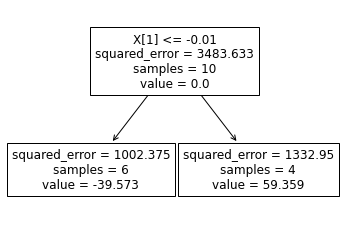

In [89]:
# посмотрим на это дерево
plot_tree(tree_2)

In [79]:
# обучим его на остатках с предыдущего шага
tree_2.fit(df[[0,1,2]], df['residual_1'])

DecisionTreeRegressor(max_depth=1)

In [80]:
# сделаем предсказание на новом дереве
df['tree_pred_2'] = tree_2.predict(df[[0,1,2]])

In [81]:
# буст
df['y_pred_2'] = df['y_pred_1'] + nu * df['tree_pred_2']

In [82]:
# считаем ошибку на предсказании второго дерева
mean_absolute_error(df['y_true'], df['y_pred_2']) # снова видим улучшение

43.76225992046251

Обернем шаги градиентного бустинга в цикл

In [85]:
df = df[[0,1,2, 'y_true']].copy() # вернемся к первоначальному датафрейму
df

,0,1,2,y_true
0,-0.111303,-0.411223,-1.076216,-71.075816
1,-0.719981,-0.401933,-0.196453,-46.575007
2,0.120886,-1.217243,-0.316446,-111.288633
3,0.299101,0.657483,1.498026,107.340996
4,0.485114,0.512510,-0.893672,17.609312
5,-0.612116,-0.720766,1.423814,-18.604904
6,-0.718693,0.381721,-0.183508,19.455643
7,-0.520255,-0.710420,-0.472840,-79.771747
8,-0.554880,0.847903,-0.243674,57.941846
9,-2.147283,-0.957793,2.130827,-28.711401


In [88]:
# с ростом числа деревьев бустинг идет к переобучению
# ошибку по-хорошему нужно считать на валидационной выборке
# как только ошибка начнет расти, цикл необходимо прервать

n_trees = 10
trees = []
df['y_pred'] = df['y_true'].mean() # константное предсказание

for i in range(n_trees):
  df['residuals'] = df['y_true'] - df['y_pred']             # считаем остатки
  tree = DecisionTreeRegressor(max_depth=1)                 # создаем дерево
  tree.fit(df[[0,1,2]], df['residuals'])                    # обучаем на остатках
  df['tree_pred'] = tree.predict(df[[0,1,2]])               # делаем предикт
  df['y_pred'] = df['y_pred'] + nu * df['tree_pred']        # бустим
  trees.append(tree)                                        # сохраняем дерево в список деревьев
  print(mean_absolute_error(df['y_true'], df['y_pred']))    # получаем ошибку

47.7195551504132
43.76225992046251
40.20069421350691
38.31246716013791
35.9084110685578
34.55612221514074
32.52770061806034
30.869921937160456
29.77629288414419
28.107441457242025


Создаем тестовые данные

In [95]:
X, y = make_regression(n_samples=10, n_features=3)

In [96]:
test = pd.DataFrame(X)
test['y_true'] = y

In [97]:
test

,0,1,2,y_true
0,1.013244,0.106553,1.652915,165.654779
1,-0.027933,0.470578,-0.895843,-19.574023
2,0.143834,-0.647156,-1.312607,-75.813472
3,0.476867,0.376809,1.476398,124.111651
4,0.696185,-1.356633,-0.324889,-17.973875
5,0.824437,0.168155,-0.597818,53.217545
6,-1.125637,0.492062,-0.058043,-76.995691
7,-0.061969,0.532480,-1.291715,-37.008623
8,-0.835283,0.437494,0.111444,-46.921493
9,-1.302838,-0.668274,-0.897134,-184.105662


In [101]:
# делаем константное предсказание для теста
test['y_pred'] = df['y_true'].mean()

In [102]:
# в цикле по деревьям забусим тестовый предикт
for tree in trees:
  test['y_pred'] += nu * tree.predict(test[[0,1,2]])

In [103]:
test

,0,1,2,y_true,y_pred
0,1.013244,0.106553,1.652915,165.654779,19.545701
1,-0.027933,0.470578,-0.895843,-19.574023,13.625063
2,0.143834,-0.647156,-1.312607,-75.813472,-35.231230
3,0.476867,0.376809,1.476398,124.111651,19.545701
4,0.696185,-1.356633,-0.324889,-17.973875,-35.231230
5,0.824437,0.168155,-0.597818,53.217545,13.625063
6,-1.125637,0.492062,-0.058043,-76.995691,19.545701
7,-0.061969,0.532480,-1.291715,-37.008623,13.625063
8,-0.835283,0.437494,0.111444,-46.921493,19.545701
9,-1.302838,-0.668274,-0.897134,-184.105662,-35.231230


Посчитаем руками производную квадратичной функции потерь

In [104]:
from sympy import *

In [105]:
y_true = Symbol('y_true')
y_pred = Symbol('y_pred')

In [107]:
((y_true - y_pred)**2) / 2

(-y_pred + y_true)**2/2

In [110]:
-1 * (diff(((y_true - y_pred)**2) / 2, y_pred))

-y_pred + y_true

# Классификация
На примере кэтбуста: под капотом задачи классификации - регрессия

после получения скора его значения преобразуются в вероятности через сигмоидную функцию

кроме этого используются другие метрики

например, roc-auc

In [111]:
# приведенный ниже пример математически не корректен,
# но демонстрирует тот факт, что классификация сводится к регресии

In [112]:
from sklearn.datasets import make_classification

In [113]:
X, y = make_classification(n_samples=10, n_features=3, n_redundant=0)

In [116]:
df = pd.DataFrame(X)
df['y_true'] = y

In [117]:
df

,0,1,2,y_true
0,-0.405103,-1.413316,-1.177095,0
1,0.915173,1.204760,-2.355209,1
2,-0.568837,-0.063879,-1.799057,1
3,0.895671,2.152856,1.201787,1
4,-2.300173,0.447536,-0.598217,0
5,-1.474051,-0.184027,1.849929,0
6,1.972898,-0.610716,0.337515,1
7,3.552773,0.863619,1.150781,1
8,-1.037277,1.243949,-0.953947,0
9,-0.168644,-1.921845,0.069150,0


In [118]:
# предсказывать будем скор, не классическую вероятность
df['y_pred'] = df['y_true'].mean()
df

,0,1,2,y_true,y_pred
0,-0.405103,-1.413316,-1.177095,0,0.5
1,0.915173,1.204760,-2.355209,1,0.5
2,-0.568837,-0.063879,-1.799057,1,0.5
3,0.895671,2.152856,1.201787,1,0.5
4,-2.300173,0.447536,-0.598217,0,0.5
5,-1.474051,-0.184027,1.849929,0,0.5
6,1.972898,-0.610716,0.337515,1,0.5
7,3.552773,0.863619,1.150781,1,0.5
8,-1.037277,1.243949,-0.953947,0,0.5
9,-0.168644,-1.921845,0.069150,0,0.5


In [119]:
# посчитаем значение метрики roc-auc
from sklearn.metrics import roc_auc_score

In [120]:
roc_auc_score(df['y_true'], df['y_pred'])

0.5

In [122]:
# используем реализацию градиентного бустинга с регрессии
n_trees = 10
trees = []
df['y_pred'] = df['y_true'].mean() # константное предсказание

for i in range(n_trees):
  df['residuals'] = df['y_true'] - df['y_pred']             # считаем остатки
  tree = DecisionTreeRegressor(max_depth=1)                 # создаем дерево
  tree.fit(df[[0,1,2]], df['residuals'])                    # обучаем на остатках
  df['tree_pred'] = tree.predict(df[[0,1,2]])               # делаем предикт
  df['y_pred'] = df['y_pred'] + nu * df['tree_pred']        # бустим
  trees.append(tree)                                        # сохраняем дерево в список деревьев
  print(roc_auc_score(df['y_true'], df['y_pred']))    # получаем ошибку

0.9
0.9
0.9
0.9
0.9
0.9
1.0
1.0
1.0
1.0


In [124]:
df

,0,1,2,y_true,y_pred,residuals,tree_pred
0,-0.405103,-1.413316,-1.177095,0,0.320046,-0.329958,-0.099118
1,0.915173,1.204760,-2.355209,1,0.859123,0.180524,0.396474
2,-0.568837,-0.063879,-1.799057,1,0.427224,0.612423,0.396474
3,0.895671,2.152856,1.201787,1,0.751945,0.238143,-0.099118
4,-2.300173,0.447536,-0.598217,0,0.272576,-0.282488,-0.099118
5,-1.474051,-0.184027,1.849929,0,0.272576,-0.282488,-0.099118
6,1.972898,-0.610716,0.337515,1,0.751945,0.238143,-0.099118
7,3.552773,0.863619,1.150781,1,0.751945,0.238143,-0.099118
8,-1.037277,1.243949,-0.953947,0,0.272576,-0.282488,-0.099118
9,-0.168644,-1.921845,0.069150,0,0.320046,-0.329958,-0.099118


In [ ]:
# видим, что скоры выше для объектов первого класса

# заметка:
# производная логарифмической функции затрат сводится к (y_true - y_pred)

# в классификации для подсчета гаммы (то, что в регрессии - среднее по сэмплам листа дерева), 
# логарифмическая функция затрат аппроксимируется с помошью полинома Тейлора
